In [2]:
! pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 29.4 MB/s eta 0:00:0000:0100:01m


In [72]:
import numpy as np
import pandas as pd
import requests
from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt
from skimage.feature import hog,local_binary_pattern,graycomatrix, graycoprops
import random
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Basic YOLO Model

In [4]:
# Load pre-trained small model 
model = YOLO("yolov8n.pt")  

# Train
model.train(
    data="/kaggle/input/pothole/data.yaml",  
    epochs=50,          
    imgsz=640,          # image size
    batch=16,          
    project="/kaggle/working/runs",
    name="pothole-yolov8"
)


Ultralytics 8.3.199 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/pothole/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=pothole-yolov8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       1219       3104      0.837      0.697      0.793      0.473
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /kaggle/working/runs/pothole-yolov8


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7eaa47d23350>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [9]:
model = YOLO("/kaggle/working/runs/pothole-yolov8/weights/best.pt")

In [12]:
img_dir = "/kaggle/input/pothole/valid/images"  
img_files = [os.path.join(img_dir, f) for f in os.listdir(img_dir) if f.endswith(('.jpg','.png','.jpeg'))]

# Select first 5 images
sample_imgs = img_files[:5]
print("Testing on:", sample_imgs)

Testing on: ['/kaggle/input/pothole/valid/images/DASH_CAM_2016_01_29_-42_Miles_of_Potholes-_mp4-280_jpg.rf.a7ed57e3633cd0f0e96c7b1bb472e102.jpg', '/kaggle/input/pothole/valid/images/6_jpg.rf.da5b413be8a10230c07b7382c663fdb2.jpg', '/kaggle/input/pothole/valid/images/img-368_jpg.rf.f9309b6160ae81c57f0a833790cb7521.jpg', '/kaggle/input/pothole/valid/images/46_jpg.rf.38b397499e720d1a3b4c417a71752b6a.jpg', '/kaggle/input/pothole/valid/images/po_2106_jpg.rf.d2e75274464367008ffaf37370d5012c.jpg']



0: 640x640 3 Potholess, 5.2ms
1: 640x640 3 Potholess, 5.2ms
2: 640x640 6 Potholess, 5.2ms
3: 640x640 2 Potholess, 5.2ms
4: 640x640 1 Potholes, 5.2ms
Speed: 1.3ms preprocess, 5.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


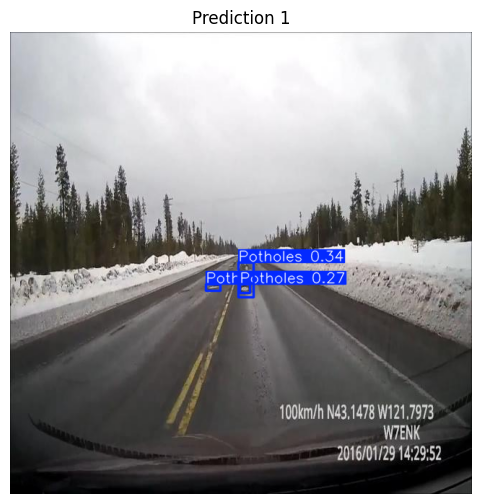

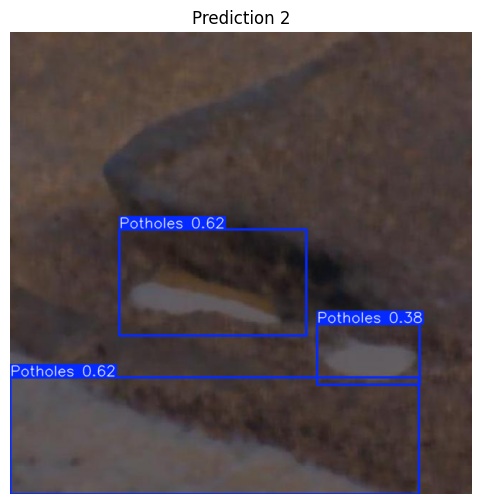

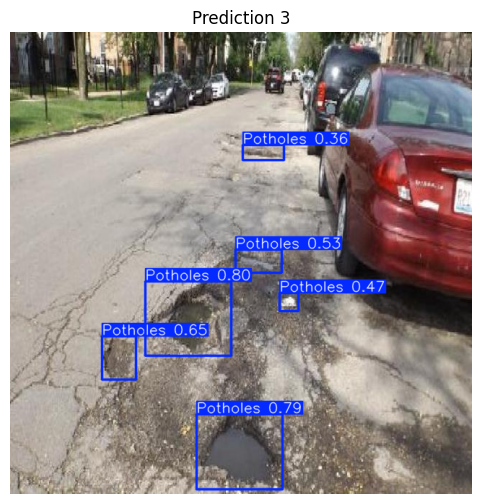

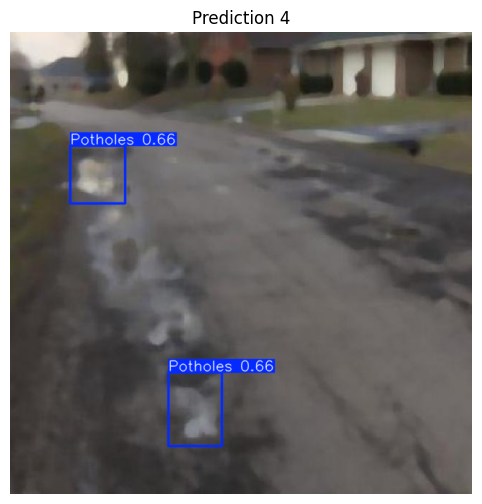

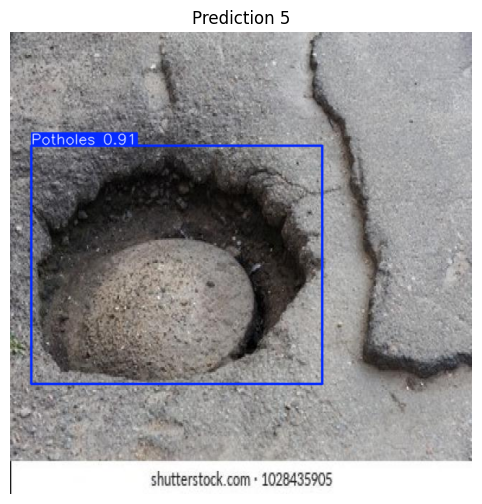

In [15]:
results = model.predict(source=sample_imgs, imgsz=640, conf=0.25, save=False)  

for i, r in enumerate(results):
    im_bgr = r.plot()
    im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 6))
    plt.imshow(im_rgb)
    plt.axis("off")
    plt.title(f"Prediction {i+1}")
    plt.show()


## Contour Method

0.6136363636363636
0.8977272727272727
20.0
0.7625
0.8682634730538922
0.4909090909090909
1.8313253012048192
0.75
1.024390243902439


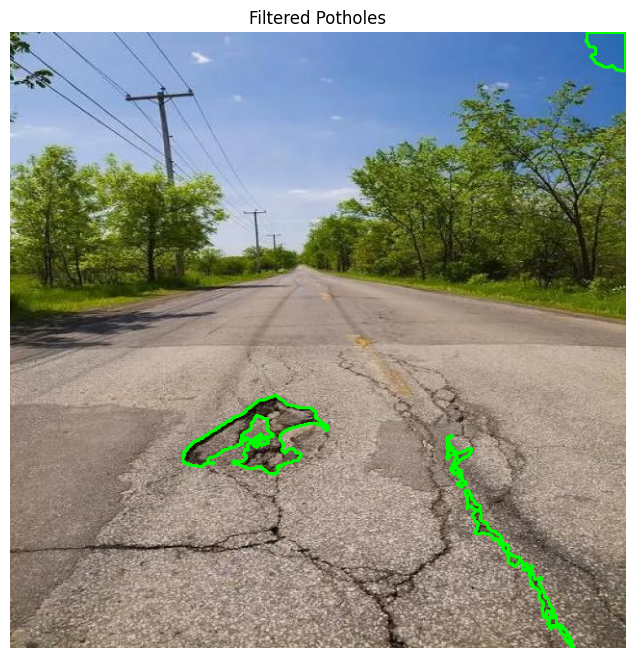

In [43]:
img = cv2.imread("/kaggle/input/pothole/train/images/0001_jpg.rf.f4566dd5089ab8abe8053c15b4199a18.jpg")

#Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 1: Preprocess
blur = cv2.GaussianBlur(gray, (5,5), 0)
_, thresh = cv2.threshold(blur, 100, 255, cv2.THRESH_BINARY_INV)

# Step 2: Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

filtered_contours = []

for c in contours:
    area = cv2.contourArea(c)
    if area < 300 or area > 12000:   # Size filter for 640x640 images
        continue
    
    x,y,w,h = cv2.boundingRect(c)
    aspect_ratio = w/float(h)
    print(aspect_ratio)
    if aspect_ratio < 0.3 or aspect_ratio > 15:  # Remove long thin cracks/shadows
        continue
    
    perimeter = cv2.arcLength(c, True)
    if perimeter == 0:
        continue
    circularity = 4 * np.pi * (area / (perimeter * perimeter))
    if circularity < 0.05 or circularity > 0.95:  # Keep only irregular but not line-like shapes
        continue

    hull = cv2.convexHull(c)
    hull_area = cv2.contourArea(hull)
    if hull_area == 0:
        continue
    solidity = float(area) / hull_area
    if solidity < 0.3:   # Shadows usually have low solidity
        continue
    
    # If passed all filters → treat as pothole
    filtered_contours.append(c)

# Step 3: Draw results
output = img.copy()
cv2.drawContours(output, filtered_contours, -1, (0,255,0), 2)

# ✅ Display using matplotlib for Kaggle
plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Filtered Potholes")
plt.axis("off")
plt.show()

## Different method

In [47]:
def extract_patches(img, contours):
    patches = []
    for c in contours:
        x,y,w,h = cv2.boundingRect(c)
        patch = img[y:y+h, x:x+w]
        patches.append(patch)
    return patches

In [48]:
def get_hog_features(patch):
    patch_resized = cv2.resize(patch, (64,64))
    gray = cv2.cvtColor(patch_resized, cv2.COLOR_BGR2GRAY)
    features, _ = hog(gray, 
                      orientations=9, 
                      pixels_per_cell=(8,8), 
                      cells_per_block=(2,2), 
                      visualize=True, 
                      block_norm='L2-Hys')
    return features

In [49]:
def get_lbp_features(patch, P=8, R=1):
    gray = cv2.cvtColor(cv2.resize(patch, (64,64)), cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray, P, R, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),
                             bins=np.arange(0, P + 3),
                             range=(0, P + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)  # normalize
    return hist


In [50]:
def get_glcm_features(patch):
    gray = cv2.cvtColor(cv2.resize(patch, (64,64)), cv2.COLOR_BGR2GRAY)
    glcm = graycomatrix(gray, [1], [0, np.pi/4, np.pi/2], symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast').mean()
    homogeneity = graycoprops(glcm, 'homogeneity').mean()
    energy = graycoprops(glcm, 'energy').mean()
    return [contrast, homogeneity, energy]

In [51]:
def extract_features(patch):
    hog_feat = get_hog_features(patch)
    lbp_feat = get_lbp_features(patch)
    glcm_feat = get_glcm_features(patch)
    return np.hstack([hog_feat, lbp_feat, glcm_feat])

In [66]:
def get_negative_patches(img, boxes, num_patches=5, patch_size=64):
    h, w = img.shape[:2]
    negatives = []
    for _ in range(num_patches):
        x1 = random.randint(0, w - patch_size)
        y1 = random.randint(0, h - patch_size)
        x2, y2 = x1 + patch_size, y1 + patch_size

        # check overlap with pothole boxes
        overlap = False
        for bx1, by1, bx2, by2 in boxes:
            if not (x2 < bx1 or x1 > bx2 or y2 < by1 or y1 > by2):
                overlap = True
                break
        if not overlap:
            negatives.append(img[y1:y2, x1:x2])
    return negatives


In [ ]:
def load_yolo_labels(txt_file, img_shape):
    h, w = img_shape[:2]
    boxes, labels = [], []

    with open(txt_file, 'r') as f:
        for line in f.readlines():
            parts = line.strip().split()
            cls = int(parts[0])
            
            if len(parts) == 5:  
                # Standard YOLO format
                _, x, y, bw, bh = map(float, parts)
                x1 = int((x - bw/2) * w)
                y1 = int((y - bh/2) * h)
                x2 = int((x + bw/2) * w)
                y2 = int((y + bh/2) * h)

            elif len(parts) > 5:  
                # Segmentation format → use bounding box of polygon
                coords = list(map(float, parts[1:]))
                xs = coords[0::2]
                ys = coords[1::2]
                x1, y1, x2, y2 = int(min(xs)*w), int(min(ys)*h), int(max(xs)*w), int(max(ys)*h)

            else:
                continue  # skip malformed lines

            boxes.append((x1, y1, x2, y2))
            labels.append(cls)

    return boxes, labels


# Example usage
image_dir = "/kaggle/input/pothole/train/images"
label_dir = "/kaggle/input/pothole/train/labels"

X, y = [], []   # start as lists

# loop over pothole patches
for (x1, y1, x2, y2), label in zip(boxes, labels):
    patch = img[y1:y2, x1:x2]
    if patch.size == 0:
        continue
    
    features = extract_features(patch)
    X.append(features)
    y.append(1)  # pothole

# loop over negative patches
for patch in neg_patches:
    if patch.size == 0:
        continue
    
    features = extract_features(patch)
    X.append(features)
    y.append(0)  # non-pothole

# ✅ convert to numpy arrays at the end
X = np.array(X)
y = np.array(y)


In [71]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [75]:
print("Total images:", len(os.listdir(image_dir)))
print("Total features extracted:", len(X))
print("Unique labels in y:", set(y))

Total images: 7481
Total features extracted: 5
Unique labels in y: {0, 1}


In [76]:
print("Processing:", img_file)
print("Boxes found:", len(boxes))

Processing: img-88_jpg.rf.9ddea8db782cf8dd4ac6bf26bf7e1620.jpg
Boxes found: 1


In [74]:
X_scaled.shape, y.shape

((5, 1777), (5,))

In [77]:
def load_yolo_labels(txt_file, img_shape):
    h, w = img_shape[:2]
    boxes, labels = [], []

    with open(txt_file, 'r') as f:
        for line in f.readlines():
            parts = line.strip().split()
            cls = int(parts[0])

            if len(parts) == 5:  # Standard YOLO format
                _, x, y, bw, bh = map(float, parts)
                x1 = int((x - bw/2) * w)
                y1 = int((y - bh/2) * h)
                x2 = int((x + bw/2) * w)
                y2 = int((y + bh/2) * h)

            elif len(parts) > 5:  # Segmentation format → bounding box of polygon
                coords = list(map(float, parts[1:]))
                xs = coords[0::2]
                ys = coords[1::2]
                x1, y1, x2, y2 = int(min(xs)*w), int(min(ys)*h), int(max(xs)*w), int(max(ys)*h)
            else:
                continue  # skip malformed lines

            boxes.append((x1, y1, x2, y2))
            labels.append(cls)

    return boxes, labels


# ✅ Main loop
image_dir = "/kaggle/input/pothole/train/images"
label_dir = "/kaggle/input/pothole/train/labels"

X, y = [], []

for img_file in os.listdir(image_dir):
    if not (img_file.endswith(".jpg") or img_file.endswith(".png")):
        continue

    img_path = os.path.join(image_dir, img_file)
    label_path = os.path.join(label_dir, img_file.rsplit(".",1)[0] + ".txt")

    if not os.path.exists(label_path):
        continue  # no labels for this image

    img = cv2.imread(img_path)
    if img is None:
        continue

    boxes, labels = load_yolo_labels(label_path, img.shape)

    # Positive samples (potholes)
    for (x1, y1, x2, y2), label in zip(boxes, labels):
        patch = img[y1:y2, x1:x2]
        if patch.size == 0:
            continue
        features = extract_features(patch)
        X.append(features)
        y.append(1)  # pothole class only

    # Negative samples (random patches)
    for _ in range(2):  # e.g. 2 negatives per image
        h, w = img.shape[:2]
        rx, ry = np.random.randint(0, w-64), np.random.randint(0, h-64)
        patch = img[ry:ry+64, rx:rx+64]
        if patch.size == 0:
            continue
        features = extract_features(patch)
        X.append(features)
        y.append(0)  # non-pothole


# ✅ Convert to numpy at the end
X = np.array(X)
y = np.array(y)

print("Total images:", len(os.listdir(image_dir)))
print("Total features extracted:", len(X))
print("Unique labels in y:", set(y))

Total images: 7481
Total features extracted: 34699
Unique labels in y: {0, 1}


In [78]:
X.shape

(34699, 1777)

In [79]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

clf = SVC(kernel="linear", probability=True)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Connecting with Google Api

In [ ]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("My_key")

In [ ]:
API_KEY = secret_value_0
OUTPUT_DIR = "street_view_images"

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

# Example: a single location and four headings for a 360-degree view
lat, lon = 40.712776, -74.005974
headings = [0, 90, 180, 270]

for heading in headings:
    url = (
        f"https://maps.googleapis.com/maps/api/streetview?"
        f"size=600x600&location={lat},{lon}&heading={heading}&"
        f"pitch=0&key={API_KEY}"
    )
    
    response = requests.get(url)
    
    if response.status_code == 200:
        filename = f"{lat}_{lon}_{heading}.jpg"
        filepath = os.path.join(OUTPUT_DIR, filename)
        with open(filepath, "wb") as f:
            f.write(response.content)
        print(f"Image saved: {filename}")
    else:
        print(f"Failed to retrieve image for location {lat},{lon} and heading {heading}. Status code: {response.status_code}")